<a href="https://colab.research.google.com/github/Lesnar9/Clothing_classifier/blob/master/Clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading all the important modules here**

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,AveragePooling2D,Flatten,Softmax,Input,Dense,Dropout
from keras.models import Model
from keras.activations import relu,sigmoid,tanh

Using TensorFlow backend.


## Loading out dataset in zip folder

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

## **Pre-Processing the Data**

In [16]:
cd/content/sample_data

/content/sample_data


In [17]:

a = pd.read_csv('mnist_test.csv')
a = np.array(a)
print(a.shape)

(9999, 785)


In [106]:
def Load_dataset():
    
    train_images = []
    cv_images = []
    root_path_train = 'Image_1/Data/train/'
    root_path_cv = 'Image_1/Data/validation/'

    for i in range(1,101):
        try:
            im = image.load_img(root_path_train + str(i) + '.jpg',target_size = (600,600))
            x = image.img_to_array(im)/255
            train_images.append(x)
    
        except:
            train_images.append(np.zeros((600,600,3)))
   
    for i in range(1,101):
        
        try:
            im = image.load_img(root_path_cv + 'str(i)' + '.jpg',target_size = (600,600))
            x = image.img_to_array(im)/255
            cv_images.append(x)
    
    
        except:
            cv_images.append(np.zeros((600,600,3)))
    
    train_images = np.array(train_images)
    cv_images = np.array(cv_images)
    a = pd.read_csv('Image_1/Input/train_labels.csv')
    Y_train = np.array(a)
    for i in range(Y_train.shape[0]):
        z = Y_train[i,0]
        z = z[1:-1]
        z = list(map(lambda x: int((x[2:-1])), z.split(', ')))
        Y_train[i,0] = z
    b= pd.read_csv('Image_1/Input/validation_labels.csv')
    Y_dev = np.array(b)
    for i in range(Y_dev.shape[0]):
        z = Y_dev[i,0]
        z = z[1:-1]
        z = list(map(lambda x: int((x[2:-1])), z.split(', ')))
        Y_dev[i,0] = z
    return train_images,cv_images,Y_train,Y_dev
  
    
  

In [107]:
X_train,X_dev,Y_train,Y_dev = Load_dataset()




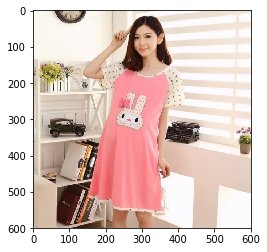

In [111]:
plt.imshow(X_train[56,:,:,:])



### Obtaining the total amount of classes

In [112]:
max_class = max([max(Y_train[i,0]) for i in range(Y_train.shape[0])])
max_class
m = Y_train.shape[0]

## Converting labels into one-hot representation

In [113]:
Y_train_one_hot = np.zeros((max_class,m))
Y_train_one_hot.shape
for i in range(m):
    l = Y_train[i,0]
    for j in l:
        Y_train_one_hot[j-1,i] = 1

In [114]:
Y_train_one_hot.shape

(228, 15000)